In [1]:
import pandas as pd
import glob

# Read all CSV files in the genre folder
genre_files = glob.glob("1_movies_per_genre/*.csv")

all_movies = []
for file in genre_files:
    df = pd.read_csv(file)
    df['genre_source'] = file.split("/")[-1].replace(".csv", "")  # to keep genre info from filename
    all_movies.append(df)
    
movies_df = pd.concat(all_movies, ignore_index=True)
print(movies_df.shape)
movies_df.head()

(1700, 11)


,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url,genre_source
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...,1_movies_per_genre\Action
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...,1_movies_per_genre\Action
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...,1_movies_per_genre\Action
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...,1_movies_per_genre\Action
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...,1_movies_per_genre\Action


In [2]:
movies_df = movies_df.drop(columns=['movie_rated', 'release_date', 'review_url', 'genre_source'], errors='ignore')
movies_df = movies_df.rename(columns={
    'rating': 'imdb_rating'
})

movies_df.head()

,name,year,run_length,genres,imdb_rating,num_raters,num_reviews
0,The Dark Knight,2008,2h 32min,Action; Crime; Drama;,9.0,2224522,6836
1,Inception,2010,2h 28min,Action; Adventure; Sci-Fi;,8.8,1981675,3820
2,The Matrix,1999,2h 16min,Action; Sci-Fi;,8.7,1619761,4281
3,The Lord of the Rings: The Fellowship of the Ring,2001,2h 58min,Action; Adventure; Drama;,8.8,1609165,5365
4,The Dark Knight Rises,2012,2h 44min,Action; Adventure;,8.4,1470329,2979


In [3]:
review_files = glob.glob("2_reviews_per_movie_raw/*.csv")

reviews = []
for file in review_files:
    df = pd.read_csv(file)
    df['movie_name'] = file.split("/")[-1].replace(".csv", "")
    reviews.append(df)
    
reviews_df = pd.concat(reviews, ignore_index=True)
print(reviews_df.shape)
reviews_df.head()

(795299, 8)


,username,rating,helpful,total,date,title,review,movie_name
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",2_reviews_per_movie_raw\10 Cloverfield Lane 2016
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,2_reviews_per_movie_raw\10 Cloverfield Lane 2016


In [4]:
reviews_df = reviews_df.drop(columns=['date'], errors='ignore')
reviews_df = reviews_df.rename(columns={
    'rating': 'user_rating',
    'title': 'review_title'
})
import os
# Update the 'movie_name' column to remove the path
reviews_df['movie_name'] = reviews_df['movie_name'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

import re
# Remove the year (4 digits at the end) and strip trailing spaces
reviews_df['movie_name_clean'] = reviews_df['movie_name'].apply(lambda x: re.sub(r'\s+\d{4}$', '', x).strip())

# lowercase for consistent matching
reviews_df['movie_name_clean'] = reviews_df['movie_name_clean'].str.lower().str.strip()
reviews_df = reviews_df.drop(columns=['movie_name'], errors='ignore')
reviews_df.head()

,username,user_rating,helpful,total,review_title,review,movie_name_clean
0,Imme-van-Gorp,7,102,123,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 cloverfield lane
1,sonofocelot-1,5,385,500,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 cloverfield lane
2,mhodaee,5,110,143,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 cloverfield lane
3,fil-nik09,5,73,100,Hmmm...\n,"First of all, I must say that I was expecting ...",10 cloverfield lane
4,DVR_Brale,7,42,56,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 cloverfield lane


In [5]:
# Step 1: Read the descriptions CSV from netflix_titles
descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')
# Step 2: Clean the movie title in descriptions_df
descriptions_df['title_clean'] = descriptions_df['title'].str.strip().str.lower()
# Step 3: Clean the name in movies_df to match
movies_df['name_clean'] = movies_df['name'].str.strip().str.lower()
# Step 4: Merge on the cleaned titles
movies_df = pd.merge(movies_df, descriptions_df[['title_clean', 'description']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)
movies_df.shape

C:\Users\Hp\AppData\Local\Temp\ipykernel_1524\1660642918.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  descriptions_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\netflix_titles.csv')


(1700, 9)

In [6]:
# Step 1: Read the overview CSV from movies metadata of tmdb
overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')
# Step 2: Clean the movie title in overview_df
overview_df['title_clean'] = overview_df['original_title'].str.strip().str.lower()
# Step 3: Merge on the cleaned titles
movies_df = pd.merge(movies_df, overview_df[['title_clean', 'overview']], 
                     left_on='name_clean', right_on='title_clean', how='left')
# Step 5: Drop the extra 'title_clean' column
movies_df.drop(columns=['title_clean'], inplace=True)



C:\Users\Hp\AppData\Local\Temp\ipykernel_1524\1412965565.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  overview_df = pd.read_csv('C:\\Users\\Hp\\Desktop\\movies_metadata\\movies_metadata.csv')


In [7]:
import pandas as pd

# Step 1: Fill NaN values in 'overview' with values from 'description'
movies_df['overview'] = movies_df['overview'].fillna(movies_df['description'])
# Step 2: Drop the 'description' column
movies_df = movies_df.drop(columns=['description'])
# Step 3: Rename 'overview' column to 'description'
movies_df = movies_df.rename(columns={'overview': 'description'})
# check how many missing descriptions are still there
missing_descriptions = movies_df['description'].isna().sum()
print(f"Missing descriptions remaining: {missing_descriptions}")
movies_df.shape

Missing descriptions remaining: 155


(1984, 9)

In [8]:
# Step 1: Drop duplicates based on name_clean and description (to avoid repeated identical rows)
movies_df = movies_df.drop_duplicates(subset=['name_clean', 'description'])

# Step 2: Sort by length of description, longest first
movies_df['desc_len'] = movies_df['description'].apply(lambda x: len(str(x)))

# Step 3: Drop duplicates based on movie name, keeping the one with longest description
movies_df_unique = movies_df.sort_values(by='desc_len', ascending=False).drop_duplicates(subset='name_clean', keep='first')

# Step 4: Drop the temporary length column
movies_df_unique = movies_df_unique.drop(columns=['desc_len'])

# Reset index
movies_df_unique = movies_df_unique.reset_index(drop=True)
movies_df_unique.head()

,name,year,run_length,genres,imdb_rating,num_raters,num_reviews,name_clean,description
0,Ben-Hur,1959,3h 32min,Adventure; Drama; History;,8.1,213444,443,ben-hur,Ben-Hur is a 1959 epic film directed by Willia...
1,No Man's Land,2001,1h 38min,Comedy; Drama; War;,7.9,43762,181,no man's land,The film starts with a story about how two mon...
2,Gladiator,2000,2h 35min,Action; Adventure; Drama;,8.5,1297718,2636,gladiator,"In the year 180, the death of emperor Marcus A..."
3,Hercules,1997,1h 33min,Animation; Adventure; Comedy;,7.3,198490,218,hercules,"Fourteen hundred years ago, a tormented soul w..."
4,The Rookie,2002,2h 7min,Drama; Sport;,6.9,31474,176,the rookie,Jim Morris never made it out of the minor leag...


In [9]:
# lowercase for consistent matching
movies_df_unique['name_clean'] = movies_df_unique['name'].str.lower().str.strip()

# Then merge
merged_df = pd.merge(reviews_df, movies_df_unique, left_on='movie_name_clean', right_on='name_clean', how='inner')

In [10]:
merged_df = merged_df.drop(['name'], axis =1)
merged_df = merged_df.drop(['name_clean'], axis =1)
merged_df.duplicated().any()
merged_df = merged_df.drop_duplicates()
merged_df.shape
merged_df = merged_df.dropna(subset=['description'])

print(merged_df.isnull().sum())
merged_df.shape

username            0
user_rating         0
helpful             0
total               0
review_title        0
review              0
movie_name_clean    0
year                0
run_length          0
genres              0
imdb_rating         0
num_raters          0
num_reviews         0
description         0
dtype: int64


(693135, 14)

In [11]:
# After cleaning user_rating
merged_df['user_rating'] = pd.to_numeric(merged_df['user_rating'], errors='coerce')

# Count how many null (NaN) values are there in 'user_rating'
null_count = merged_df['user_rating'].isnull().sum()

print(f"Number of nulls in 'user_rating': {null_count}")

# Now drop rows where 'user_rating' is null
merged_df = merged_df.dropna(subset=['user_rating'])

# Reset index after dropping rows
merged_df = merged_df.reset_index(drop=True)
merged_df.shape

Number of nulls in 'user_rating': 78433


(614702, 14)

In [12]:
sample_df = merged_df.sample(n=1000, random_state=42)

In [13]:
sample_df.shape

(1000, 14)

In [14]:
import pandas as pd
import numpy as np
import re

def transform_merged_df(df):
    # 1. Convert numeric columns where necessary
    df['helpful'] = pd.to_numeric(df['helpful'], errors='coerce')
    df['total'] = pd.to_numeric(df['total'], errors='coerce')
    df['num_raters'] = pd.to_numeric(df['num_raters'], errors='coerce')
    df['num_reviews'] = pd.to_numeric(df['num_reviews'], errors='coerce')

    # 2. Convert runtime (e.g., "1h 43min" -> 103 minutes)
    def parse_runtime(s):
        if pd.isna(s):
            return np.nan
        match = re.match(r'(?:(\d+)h)?\s*(?:(\d+)min)?', str(s))
        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            return hours * 60 + minutes
        return np.nan
    
    df['run_length'] = df['run_length'].apply(parse_runtime)

    # 3. Clean string/text columns and handle 'no description', empty strings
    text_cols = ['username', 'review_title', 'review', 'genres', 'movie_name_clean', 'description']
    for col in text_cols:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()
            df[col] = df[col].replace(['nan', 'null', '', 'none', 'no description', '0'], np.nan)

    # 4. Drop duplicates 
    df = df.drop_duplicates()

    return df

sample_df = transform_merged_df(sample_df)
print(sample_df.dtypes)


username             object
user_rating         float64
helpful               int64
total                 int64
review_title         object
review               object
movie_name_clean     object
year                  int64
run_length            int64
genres               object
imdb_rating         float64
num_raters            int64
num_reviews           int64
description          object
dtype: object


In [28]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Load and preprocess a small subset taken from dataset, Drop duplicates and sample from the dataset

sample_df = sample_df.copy()
sample_df = sample_df.reset_index(drop=True)

sample_df = sample_df.drop_duplicates(subset='movie_name_clean')

In [29]:
# Replace 'Null' with actual NaN values
sample_df.loc[:, 'user_rating'] = sample_df['user_rating'].replace('Null', np.nan)

# Convert to numeric, coercing errors to NaN
sample_df.loc[:, 'user_rating'] = pd.to_numeric(sample_df['user_rating'], errors='coerce')

# Fill NaNs with 0 initially (to clean data before calculating averages)
sample_df.loc[:, 'user_rating'] = sample_df['user_rating'].fillna(0)

# Calculate global average excluding 0 ratings
global_avg = sample_df.loc[sample_df['user_rating'] != 0, 'user_rating'].mean()

# Replace 0.0 in user rating with the average rating for that movie (excluding 0s), else use global_avg
sample_df.loc[:, 'user_rating'] = sample_df.groupby('movie_name_clean')['user_rating'].transform(
    lambda x: x.replace(0, x[x != 0].mean() if not x[x != 0].empty else global_avg)
)

# Handle missing descriptions
sample_df.loc[:, 'description'] = sample_df['description'].fillna('No description available')

In [30]:
# Step 1: Item-based Collaborative Filtering using cosine similarity

# Let's consider 'movie_name_clean' as the movie name, and 'user_rating' as user ratings
movie_ratings_matrix = sample_df.pivot_table(index='username', columns='movie_name_clean', values='user_rating')

# Fill missing values with user mean for collaborative filtering
movie_ratings_matrix = movie_ratings_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# In case some users have all NaNs (mean is still NaN), fill remaining NaNs with global mean
global_mean = movie_ratings_matrix.stack().mean()
movie_ratings_matrix = movie_ratings_matrix.fillna(global_mean)
movie_ratings_matrix = movie_ratings_matrix.apply(lambda row: row.replace(0, row.mean()), axis=1)

# Calculate cosine similarity between movies
cosine_sim = cosine_similarity(movie_ratings_matrix.T)

In [31]:
# Step 2: Content-Based Filtering using BERT embeddings for movie descriptions

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [32]:
# Function to get BERT embeddings for a movie description
def get_bert_embedding(description):
    inputs = tokenizer(description, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

# Get embeddings for each movie description
movie_descriptions = sample_df['description'].tolist()  # Ensure it's a plain list

# Collect embeddings as 2D vectors
embeddings = []

for desc in movie_descriptions:
    inputs = tokenizer(desc, return_tensors='pt', truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    mean_embedding = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
    embeddings.append(mean_embedding)

# Convert to 2D numpy array
embeddings = np.array(embeddings)  # Now shape will be (n_movies, embedding_dim)

content_cosine_sim = cosine_similarity(embeddings)

In [33]:
# Step 3: Combine the CF and Content-based recommendations using a weighted sum

alpha = 0.3 

# Combine the similarity matrices (CF + Content)
hybrid_cosine_sim = alpha * cosine_sim + (1 - alpha) * content_cosine_sim

In [34]:
# Step 4: Generate hybrid recommendation scores for all movies
hybrid_recs_list = []

for idx in range(len(sample_df)):
    movie_name = sample_df.iloc[idx]['movie_name_clean']
    
    sim_scores = list(enumerate(hybrid_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the movie itself
    sim_scores = [score for score in sim_scores if score[0] != idx]
    
    # Take top-1 similar movie's similarity score
    top_sim = sim_scores[0]
    top_sim_score = top_sim[1]

    hybrid_recs_list.append({
        'movie_name_clean': movie_name,
        'hybrid_score': top_sim_score
    })

# Store as DataFrame
hybrid_recs = pd.DataFrame(hybrid_recs_list)

In [35]:
# Step 5: Recommendation function with target movie
def recommend_movies_with_scores(movie_name, hybrid_sim_matrix, top_n=5):
    indices = sample_df[sample_df['movie_name_clean'] == movie_name].index
    if len(indices) == 0:
        print(f"❌ Movie '{movie_name}' not found in the sample dataset.")
        return pd.DataFrame(), []
    
    idx = indices[0]
    sim_scores = list(enumerate(hybrid_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the target movie itself
    sim_scores = [score for score in sim_scores if score[0] != idx]
    
    top_scores = sim_scores[:top_n]
    movie_indices = [i[0] for i in top_scores]
    similarities = [i[1] for i in top_scores]
    
    return sample_df.iloc[movie_indices][['movie_name_clean', 'description', 'genres', 'user_rating', 'imdb_rating']], similarities

In [37]:
target_movie = 'zootopia'
recommended_movies, similarities = recommend_movies_with_scores(target_movie, hybrid_cosine_sim, top_n=5)

# Actual ratings
actual_ratings = recommended_movies['user_rating'].values

# Predicted ratings based on similarity weighted average
weighted_sum = np.sum(actual_ratings * similarities)
sum_of_similarities = np.sum(similarities)

predicted_rating = weighted_sum / sum_of_similarities

# Predict rating for each recommended movie based on its own top-k similar movies
def predict_rating_for_movie(movie_idx, hybrid_sim_matrix, ratings_df, top_k=11):
    # Get similarity scores for the movie
    sim_scores = list(enumerate(hybrid_sim_matrix[movie_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the movie itself
    sim_scores = [score for score in sim_scores if score[0] != movie_idx]
    
    # Pick top-k similar movies
    top_similar = sim_scores[:top_k]
    
    weighted_sum = 0
    sim_sum = 0
    for idx, sim in top_similar:
        rating = ratings_df.iloc[idx]['user_rating']
        if not np.isnan(rating):
            weighted_sum += rating * sim
            sim_sum += sim
    
    return weighted_sum / sim_sum if sim_sum != 0 else global_avg

# Predict ratings individually for recommended movies
predicted_ratings = []
for i in recommended_movies.index:
    movie_position = sample_df.index.get_loc(i)
    predicted = predict_rating_for_movie(movie_position, hybrid_cosine_sim, sample_df)
    predicted_ratings.append(predicted)
    
predicted_ratings = np.array(predicted_ratings)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

threshold = 6.5
actual_binary = (actual_ratings >= threshold).astype(int)
predicted_binary = (predicted_ratings >= threshold).astype(int)

precision = precision_score(actual_binary, predicted_binary)
recall = recall_score(actual_binary, predicted_binary)
f1 = f1_score(actual_binary, predicted_binary)
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f"📊 Evaluation for Hybrid System (Target: '{target_movie}'):")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"RMSE: {rmse:.4f}")

📊 Evaluation for Hybrid System (Target: 'zootopia'):
Precision: 0.6000
Recall: 1.0000
F1-Score: 0.7500
RMSE: 1.7202


In [43]:
import pandas as pd

# Sample subset of movies already sampled from the merged_df
sample_data = sample_df.copy()
sample_data = sample_data.reset_index(drop=True)

# Ensure that 'review' and 'genres' columns are present and clean
sample_data = sample_data.dropna(subset=['review', 'genres'])

# Extract the 'review' column for sentiment analysis
reviews = sample_data[['movie_name_clean', 'review', 'genres', 'user_rating', 'description']]

# Preview the data
reviews.head()

,movie_name_clean,review,genres,user_rating,description
0,fifty shades of grey,the movie was not that bad. people just love t...,romance;,7.0,when college senior anastasia steele steps in ...
1,looper,positives:<br/><br/>1) bruce willis gives his ...,action; drama; sci-fi;,7.0,"in the futuristic action thriller looper, time..."
2,the blair witch project,"""the blair witch project"" is undoubtedly, unqu...",horror; mystery;,10.0,in october of 1994 three student filmmakers di...
3,the dark knight rises,"i have never been a batman fan, and this tripe...",action; adventure;,3.0,following the death of district attorney harve...
4,north by northwest,considering the amount of films i have seen ov...,adventure; mystery; thriller;,4.0,advertising man roger thornhill is mistaken fo...


In [44]:
import re
import string

# Function for basic text cleaning
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'<[^>]*>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

# Apply cleaning to all reviews
sample_data['cleaned_review'] = sample_data['review'].apply(clean_text)

# Preview the cleaned reviews
sample_data[['movie_name_clean', 'cleaned_review', 'user_rating', 'description']].head()


,movie_name_clean,cleaned_review,user_rating,description
0,fifty shades of grey,the movie was not that bad people just love to...,7.0,when college senior anastasia steele steps in ...
1,looper,positives1 bruce willis gives his best perform...,7.0,"in the futuristic action thriller looper, time..."
2,the blair witch project,the blair witch project is undoubtedly unquest...,10.0,in october of 1994 three student filmmakers di...
3,the dark knight rises,i have never been a batman fan and this tripe ...,3.0,following the death of district attorney harve...
4,north by northwest,considering the amount of films i have seen ov...,4.0,advertising man roger thornhill is mistaken fo...


In [45]:
import string

# Define a list of stopwords
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", 
    "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", 
    "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", 
    "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", 
    "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", 
    "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should",
    "now", "d", "ll", "m", "o", "re", "ve", "y", "ain", "aren", "couldn", "didn", "doesn", "hadn", "hasn", "haven", "isn", "ma", 
    "mightn", "mustn", "needn", "shan", "shouldn", "wasn", "weren", "won", "wouldn"
])

# Function for manual tokenization and removing stopwords
def manual_tokenize_and_remove_stopwords(text):
    # Convert text to lowercase and split it into words
    words = text.lower().split()
    
    # Remove punctuation and non-alphabetic characters
    words = [word.strip(string.punctuation) for word in words if word.strip(string.punctuation).isalpha()]
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    
    return " ".join(words)

# Apply manual tokenization and stopwords removal to cleaned reviews
sample_data['cleaned_review'] = sample_data['cleaned_review'].apply(manual_tokenize_and_remove_stopwords)

# Preview the cleaned reviews after tokenization and stopwords removal
sample_data[['movie_name_clean', 'cleaned_review', 'user_rating', 'description']].head()


,movie_name_clean,cleaned_review,user_rating,description
0,fifty shades of grey,movie bad people love hate thought quite enjoy...,7.0,when college senior anastasia steele steps in ...
1,looper,bruce willis gives best performance years best...,7.0,"in the futuristic action thriller looper, time..."
2,the blair witch project,blair witch project undoubtedly unquestionably...,10.0,in october of 1994 three student filmmakers di...
3,the dark knight rises,never batman fan tripe could never invest emot...,3.0,following the death of district attorney harve...
4,north by northwest,considering amount films seen years dont think...,4.0,advertising man roger thornhill is mistaken fo...


In [46]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the sentiment score using VADER
def get_sentiment_score(review):
    # Get the sentiment score
    sentiment = sia.polarity_scores(review)
    # Return the compound score (this ranges from -1 (negative) to 1 (positive))
    return sentiment['compound']

# Apply the sentiment analysis to each cleaned review
sample_data['rvw_sentiment_score'] = sample_data['cleaned_review'].apply(get_sentiment_score)

# Preview the sentiment scores for each review
sample_data[['movie_name_clean', 'cleaned_review', 'rvw_sentiment_score', 'user_rating', 'description']].head()


,movie_name_clean,cleaned_review,rvw_sentiment_score,user_rating,description
0,fifty shades of grey,movie bad people love hate thought quite enjoy...,0.7425,7.0,when college senior anastasia steele steps in ...
1,looper,bruce willis gives best performance years best...,0.9286,7.0,"in the futuristic action thriller looper, time..."
2,the blair witch project,blair witch project undoubtedly unquestionably...,-0.9860,10.0,in october of 1994 three student filmmakers di...
3,the dark knight rises,never batman fan tripe could never invest emot...,0.9524,3.0,following the death of district attorney harve...
4,north by northwest,considering amount films seen years dont think...,0.3718,4.0,advertising man roger thornhill is mistaken fo...


In [51]:
# Classify sentiment based on VADER scores
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification to sentiment scores
sample_data['rvw_predicted_sentiment'] = sample_data['rvw_sentiment_score'].apply(classify_sentiment)

# Preview the resulting classifications
sample_data[['movie_name_clean', 'cleaned_review', 'rvw_sentiment_score', 'rvw_predicted_sentiment', 'user_rating', 'description']].head()


,movie_name_clean,cleaned_review,rvw_sentiment_score,rvw_predicted_sentiment,user_rating,description
0,fifty shades of grey,movie bad people love hate thought quite enjoy...,0.7425,Positive,7.0,when college senior anastasia steele steps in ...
1,looper,bruce willis gives best performance years best...,0.9286,Positive,7.0,"in the futuristic action thriller looper, time..."
2,the blair witch project,blair witch project undoubtedly unquestionably...,-0.9860,Negative,10.0,in october of 1994 three student filmmakers di...
3,the dark knight rises,never batman fan tripe could never invest emot...,0.9524,Positive,3.0,following the death of district attorney harve...
4,north by northwest,considering amount films seen years dont think...,0.3718,Positive,4.0,advertising man roger thornhill is mistaken fo...


In [54]:
# Compute average rating per movie
avg_ratings = merged_df.groupby('movie_name_clean')['user_rating'].mean().reset_index()
avg_ratings.columns = ['movie_name_clean', 'avg_rating']  # Explicitly name columns

# Merge with original DataFrame to add avg_rating as a new column
merged_df = merged_df.merge(avg_ratings, on='movie_name_clean', how='left')
sample_df.drop(columns=['avg_rating'], inplace=True)

In [56]:
sample_df = sample_df.merge(
    merged_df[['movie_name_clean', 'avg_rating']].drop_duplicates(),
    on='movie_name_clean',
    how='left'
)

In [58]:
sample_data = sample_data.merge(
    merged_df[['movie_name_clean', 'avg_rating']].drop_duplicates(),
    on='movie_name_clean',
    how='left'
)

In [67]:
sample_data.head()

,movie_name_clean,cleaned_review,rvw_sentiment_score,rvw_predicted_sentiment,avg_rating,user_rating,actual_sentiment
0,fifty shades of grey,movie bad people love hate thought quite enjoy...,0.7425,Positive,5.092359,7.0,Positive
1,looper,bruce willis gives best performance years best...,0.9286,Positive,6.539295,7.0,Positive
2,the blair witch project,blair witch project undoubtedly unquestionably...,-0.9860,Negative,5.693716,10.0,Positive
3,the dark knight rises,never batman fan tripe could never invest emot...,0.9524,Positive,7.664803,3.0,Negative
4,north by northwest,considering amount films seen years dont think...,0.3718,Positive,8.687755,4.0,Negative


In [60]:
sample_data = sample_data[[
    'movie_name_clean', 'cleaned_review', 'rvw_sentiment_score', 'rvw_predicted_sentiment', 'avg_rating', 'user_rating'
]]


In [66]:
def map_rating_to_sentiment(rating):
    if rating >= 7.0:
        return 'Positive'
    elif rating >= 5.0:
        return 'Neutral'
    else:
        return 'Negative'

sample_data['actual_sentiment'] = sample_data['user_rating'].apply(map_rating_to_sentiment)

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.optim import AdamW
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from collections import Counter

In [40]:
print(sample_df.columns)

Index(['username', 'user_rating', 'helpful', 'total', 'review_title', 'review',
       'movie_name_clean', 'year', 'run_length', 'genres', 'imdb_rating',
       'num_raters', 'num_reviews', 'description'],
      dtype='object')


In [73]:
# Step 1: Dataset prep
sample_data = sample_data.copy()
sample_data = sample_data.reset_index(drop=True)

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
sample_data['sentiment_label'] = le.fit_transform(sample_data['actual_sentiment'])  # Encode: Negative=0, Neutral=1, Positive=2


In [75]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(np.array(X).reshape(-1, 1), sample_data['sentiment_label'].values)
X_resampled = X_resampled.flatten()
y_resampled = y_resampled.astype(np.int64)
print("After oversampling:", Counter(y_resampled))

# Compute class weights for 3 classes
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled), y=y_resampled)
class_weights = torch.tensor(class_weights, dtype=torch.float)


After oversampling: Counter({2: 360, 0: 360, 1: 360})


In [76]:
# Stratified train-test split
X_train_texts, X_test_texts, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(list(X_train_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(list(X_test_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

class SentimentDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: val[idx] for key, val in self.inputs.items()}, self.labels[idx]

train_dataset = SentimentDataset(train_encodings, y_train)
test_dataset = SentimentDataset(test_encodings, y_test)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

In [77]:
# Model & Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)  # 3 classes
model.to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [78]:
# Freeze lower layers (layer 0 and 1)
for name, param in model.distilbert.named_parameters():
    if 'transformer.layer.0' in name or 'transformer.layer.1' in name:
        param.requires_grad = False

optimizer = AdamW(model.parameters(), lr=3e-5)

# Move class weights to device
class_weights = class_weights.to(device)

# Training loop
model.train()
for epoch in range(5):
    print(f"Epoch {epoch + 1}")
    total_loss = 0
    for batch in train_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = torch.nn.functional.cross_entropy(outputs.logits, labels, weight=class_weights)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    print(f"  Loss: {total_loss / len(train_loader):.4f}")



Epoch 1
  Loss: 1.0284
Epoch 2
  Loss: 0.4612
Epoch 3
  Loss: 0.1069
Epoch 4
  Loss: 0.0678
Epoch 5
  Loss: 0.0384


In [79]:
from sklearn.metrics import classification_report

model.eval()
predictions, true_labels = [], []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device)

        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=1)

        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

print("\n📊 Classification Report:")
print(classification_report(true_labels, predictions, target_names=le.classes_))  # target_names to display sentiment labels



📊 Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95        72
     Neutral       0.87      1.00      0.93        72
    Positive       1.00      0.81      0.89        72

    accuracy                           0.93       216
   macro avg       0.93      0.93      0.92       216
weighted avg       0.93      0.93      0.92       216



In [80]:
import pandas as pd

# Map numeric labels to string sentiments
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
predicted_labels = [label_map[p] for p in predictions]
actual_labels = [label_map[t] for t in true_labels]

# Print sample predictions
print("\n🔍 Sample Predictions:")
for i in range(10):  # First 10 examples
    print(f"Predicted: {predicted_labels[i]} | Actual: {actual_labels[i]}")

# Create a DataFrame to view results
results_df = pd.DataFrame({
    'cleaned_review': X_test_texts,
    'actual_sentiment': actual_labels,
    'predicted_sentiment': predicted_labels
})

# Preview
results_df.head()



🔍 Sample Predictions:
Predicted: Negative | Actual: Negative
Predicted: Positive | Actual: Positive
Predicted: Positive | Actual: Positive
Predicted: Positive | Actual: Positive
Predicted: Neutral | Actual: Neutral
Predicted: Positive | Actual: Positive
Predicted: Negative | Actual: Positive
Predicted: Positive | Actual: Positive
Predicted: Negative | Actual: Negative
Predicted: Negative | Actual: Negative


,cleaned_review,actual_sentiment,predicted_sentiment
0,common film life people behind bars prison not...,Negative,Negative
1,jaws first film ever saw day scares put quite ...,Positive,Positive
2,personal favorite watched numerous times every...,Positive,Positive
3,impressed first saw gave good movie perfect on...,Positive,Positive
4,london surgeon frederick treves anthony hopkin...,Neutral,Neutral


In [81]:
import torch
import numpy as np

def predict_sentiment_for_reviews(model, tokenizer, texts, batch_size=8):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    all_preds = []

    with torch.no_grad():
        for i in range(0, len(texts), batch_size):
            batch_texts = texts[i:i+batch_size]
            encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors="pt")
            encodings = {k: v.to(device) for k, v in encodings.items()}
            outputs = model(**encodings)
            preds = torch.argmax(outputs.logits, dim=1)
            all_preds.extend(preds.cpu().numpy())

    return np.array(all_preds)

# Predict sentiment for all reviews in the dataset
sample_data = sample_data.copy()
sample_data['predicted_sentiment'] = predict_sentiment_for_reviews(
    model, tokenizer, sample_data['cleaned_review'].tolist()
)


In [82]:
# Group by movie and calculate average sentiment score
sentiment_scores = sample_data.groupby('movie_name_clean')['predicted_sentiment'].mean().reset_index()
sentiment_scores.columns = ['movie_name_clean', 'avg_sentiment']

In [83]:
# Merge sentiment scores with hybrid recommendations
enhanced_hybrid = hybrid_recs.merge(sentiment_scores, on='movie_name_clean', how='left')

# Handle any missing values (if any movies have no reviews)
enhanced_hybrid['avg_sentiment'] = enhanced_hybrid['avg_sentiment'].fillna(0.5)  # neutral default

# Normalize sentiment score between 0 and 1
min_sent = enhanced_hybrid['avg_sentiment'].min()
max_sent = enhanced_hybrid['avg_sentiment'].max()

enhanced_hybrid['normalized_sentiment'] = (enhanced_hybrid['avg_sentiment'] - min_sent) / (max_sent - min_sent + 1e-8)


In [103]:
# Tune these weights to control influence of sentiment
alpha = 0.7  # weight for original hybrid score
beta = 0.3   # weight for sentiment score

enhanced_hybrid['final_score'] = (
    alpha * enhanced_hybrid['hybrid_score'] + beta * enhanced_hybrid['normalized_sentiment']
)
# Scale final_score to 1–10 range for fair comparison
min_score = enhanced_hybrid['final_score'].min()
max_score = enhanced_hybrid['final_score'].max()
enhanced_hybrid['final_score_scaled'] = 1 + 9 * (enhanced_hybrid['final_score'] - min_score) / (max_score - min_score + 1e-8)

# Sort by final score
enhanced_hybrid = enhanced_hybrid.sort_values(by='final_score', ascending=True).reset_index(drop=True)


In [104]:
# Show top recommendations
print(enhanced_hybrid[['movie_name_clean', 'hybrid_score', 'normalized_sentiment', 'final_score']].head())


  movie_name_clean  hybrid_score  normalized_sentiment  final_score
0           jackie      0.824705                   0.0     0.577294
1        malcolm x      0.841429                   0.0     0.589000
2    the new world      0.842221                   0.0     0.589555
3     grudge match      0.868713                   0.0     0.608099
4          deja vu      0.871426                   0.0     0.609998


In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Merge true ratings into enhanced_hybrid
rating_df = sample_data[['movie_name_clean', 'user_rating']].drop_duplicates()
evaluation_df = enhanced_hybrid.merge(rating_df, on='movie_name_clean', how='inner')

rmse = np.sqrt(mean_squared_error(evaluation_df['user_rating'], evaluation_df['final_score_scaled']))
mae = mean_absolute_error(evaluation_df['user_rating'], evaluation_df['final_score_scaled'])

print(f"\n📊 Evaluation:\nRMSE: {rmse:.4f}\nMAE: {mae:.4f}")


📊 Evaluation:
RMSE: 1.3514
MAE: 1.0495


In [99]:
# Scale hybrid_score as well
min_h = hybrid_recs['hybrid_score'].min()
max_h = hybrid_recs['hybrid_score'].max()
hybrid_recs['hybrid_score_scaled'] = 1 + 9 * (hybrid_recs['hybrid_score'] - min_h) / (max_h - min_h + 1e-8)

# Merge and evaluate
eval_baseline = hybrid_recs.merge(rating_df, on='movie_name_clean', how='inner')

rmse_baseline = np.sqrt(mean_squared_error(eval_baseline['user_rating'], eval_baseline['hybrid_score_scaled']))
mae_baseline = mean_absolute_error(eval_baseline['user_rating'], eval_baseline['hybrid_score_scaled'])

print(f"\n📊 Baseline Evaluation (Without Sentiment):\nRMSE: {rmse_baseline:.4f}\nMAE: {mae_baseline:.4f}")



📊 Baseline Evaluation (Without Sentiment):
RMSE: 2.9175
MAE: 2.3420


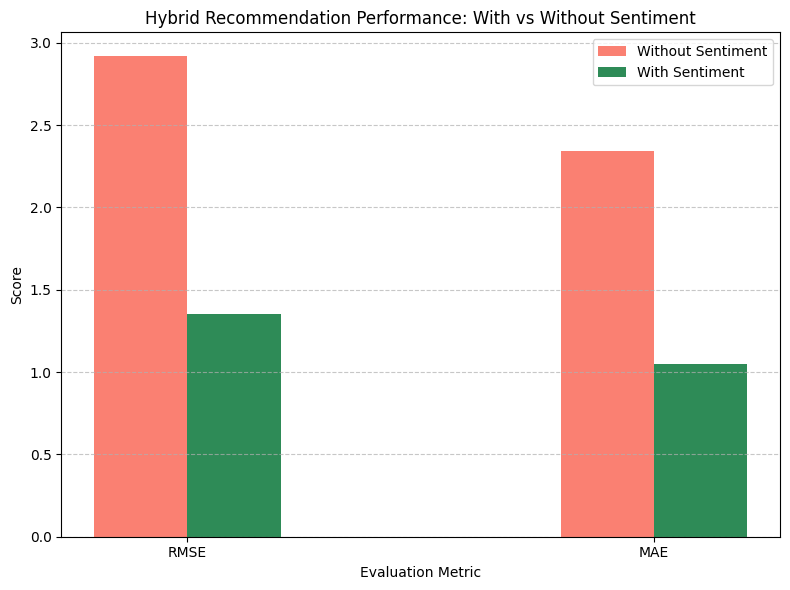

In [107]:
import matplotlib.pyplot as plt

# Metrics
metrics = ['RMSE', 'MAE']
baseline_scores = [2.9175, 2.3420]  # Without sentiment
enhanced_scores = [1.3514, 1.0495]  # With sentiment

x = range(len(metrics))
bar_width = 0.2

# Plot
plt.figure(figsize=(8, 6))
plt.bar(x, baseline_scores, width=bar_width, label='Without Sentiment', color='salmon')
plt.bar([i + bar_width for i in x], enhanced_scores, width=bar_width, label='With Sentiment', color='seagreen')

# Labels and formatting
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Hybrid Recommendation Performance: With vs Without Sentiment')
plt.xticks([i + bar_width / 2 for i in x], metrics)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [111]:
sample_data.head()
# sample_data = sample_data.merge(
#     merged_df[['movie_name_clean', 'genres', 'description', 'imdb_rating']].drop_duplicates(),
#     on='movie_name_clean',
#     how='left'
# )

,movie_name_clean,cleaned_review,rvw_sentiment_score,rvw_predicted_sentiment,avg_rating,user_rating,actual_sentiment,sentiment_label,predicted_sentiment,genres,description,imdb_rating
0,fifty shades of grey,movie bad people love hate thought quite enjoy...,0.7425,Positive,5.092359,7.0,Positive,2,0,Romance;,When college senior Anastasia Steele steps in ...,4.1
1,looper,bruce willis gives best performance years best...,0.9286,Positive,6.539295,7.0,Positive,2,2,Action; Drama; Sci-Fi;,"In the futuristic action thriller Looper, time...",7.4
2,the blair witch project,blair witch project undoubtedly unquestionably...,-0.9860,Negative,5.693716,10.0,Positive,2,2,Horror; Mystery;,In October of 1994 three student filmmakers di...,6.5
3,the dark knight rises,never batman fan tripe could never invest emot...,0.9524,Positive,7.664803,3.0,Negative,0,0,Action; Adventure;,Following the death of District Attorney Harve...,8.4
4,north by northwest,considering amount films seen years dont think...,0.3718,Positive,8.687755,4.0,Negative,0,0,Adventure; Mystery; Thriller;,Advertising man Roger Thornhill is mistaken fo...,8.3


In [131]:
# Ensure aligned order of movies
movie_order = sample_data['movie_name_clean'].tolist()

# Create sentiment similarity matrix using outer product
sent_vector = enhanced_hybrid.set_index('movie_name_clean').loc[movie_order]['normalized_sentiment'].values
sentiment_sim_matrix = np.outer(sent_vector, sent_vector)

# Final hybrid matrix weights
alpha = 0.5  # content
beta = 0.3   # collaborative
gamma = 0.2  # sentiment

# Final hybrid similarity matrix
final_hybrid_sim_matrix = (
    alpha * content_cosine_sim +
    beta * cosine_sim +
    gamma * sentiment_sim_matrix
)


In [132]:
def recommend_movies(movie_name, hybrid_matrix, top_n=5):
    indices = sample_data[sample_data['movie_name_clean'] == movie_name].index
    if len(indices) == 0:
        print(f"❌ Movie '{movie_name}' not found.")
        return pd.DataFrame()
    
    idx = indices[0]
    sim_scores = list(enumerate(hybrid_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [score for score in sim_scores if score[0] != idx]
    
    top_scores = sim_scores[:top_n]
    movie_indices = [i[0] for i in top_scores]
    similarities = [i[1] for i in top_scores]

    result = sample_df.iloc[movie_indices][['movie_name_clean', 'description', 'genres', 'user_rating', 'imdb_rating']].copy()
    result['similarity_score'] = similarities
    return result


In [133]:
def compare_recommendations(movie_name, top_n=5):
    print(f"\n🎬 Recommendations for: {movie_name}\n")

    print("🔹 Hybrid (Without Sentiment):")
    baseline_matrix = (alpha + beta) * (
        content_cosine_sim * (alpha / (alpha + beta)) +
        cosine_sim * (beta / (alpha + beta))
    )
    baseline_recs = recommend_movies(movie_name, baseline_matrix, top_n)
    print(baseline_recs[['movie_name_clean', 'similarity_score']])

    print("\n🔹 Hybrid (With Sentiment):")
    hybrid_recs = recommend_movies(movie_name, final_hybrid_sim_matrix, top_n)
    print(hybrid_recs[['movie_name_clean', 'similarity_score']])
    
    return baseline_recs, hybrid_recs


In [144]:
# Example: Compare for a specific movie
movie_to_test = 'spider-man'  # or any from sample_df
baseline, enhanced = compare_recommendations(movie_to_test)


🎬 Recommendations for: spider-man

🔹 Hybrid (Without Sentiment):
    movie_name_clean  similarity_score
327     spider-man 2          0.740678
336   fantastic four          0.738270
109         kick-ass          0.724948
87          deadpool          0.723514
261   justice league          0.718107

🔹 Hybrid (With Sentiment):
    movie_name_clean  similarity_score
336   fantastic four          0.938270
87          deadpool          0.923514
44        iron man 3          0.913670
250            x-men          0.911124
358   the terminator          0.911030


In [137]:
# Example: Accessing the 'movie_name_clean' column values
movie_names = sample_data['movie_name_clean'].values
print(movie_names)

['fifty shades of grey' 'looper' 'the blair witch project'
 'the dark knight rises' 'north by northwest' 'the amazing spider-man'
 'lost in translation' 'the princess bride' 'a star is born'
 "all the president's men" "one flew over the cuckoo's nest"
 'me before you' 'frozen' 'saving private ryan' 'hot fuzz' 'the lobster'
 'the town' 'the others' 'bridge of spies' 'pitch perfect 2'
 'the fifth element' 'draft day' '12 years a slave' 'marie antoinette'
 'the martian' 'the deer hunter' 'creed' 'american sniper' 'pi'
 'the thin red line' 'the hangover' 'notting hill' 'the exorcist'
 'kung fu panda' 'black mass' 'alexander' 'interstellar'
 'the matrix reloaded' 'the simpsons movie' 'split' 'child 44'
 'suicide squad' 'midway' 'wanted' 'iron man 3' 'resident evil'
 'baby driver' 'furious 7' 'prometheus' 'i am legend'
 'harry potter and the chamber of secrets' 'source code' 'hancock'
 'back to the future part ii' 'superbad' 'to kill a mockingbird' 'frank'
 'coco' '10 things i hate about you